In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv('emails.csv')

In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
#Visualisation
ham = df[df['spam']==0]
spam = df[df['spam']==1]
print('percentage of spam :',(len(spam)/len(df))*100,'%')
print('percentage of ham :',(len(ham)/len(df))*100,'%')

percentage of spam : 23.88268156424581 %
percentage of ham : 76.11731843575419 %


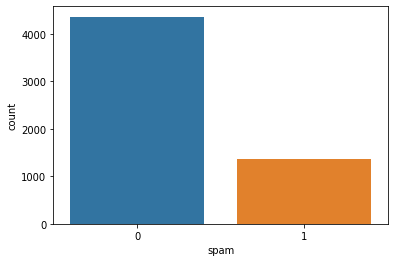

In [11]:
sns.countplot(df['spam'])

In [19]:
 #count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
sample_data=['this is the first document','This document is the second document','And this is the third document','this is the last document']



In [20]:
#check count vectorizer
vec = CountVectorizer()
X  = vec.fit_transform(sample_data)
print (X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 1 0 1 0 0 1 1 1]
 [0 1 0 1 1 0 1 0 1]]


In [27]:
vec = CountVectorizer()
All_vec = vec.fit_transform(df['text'])

In [29]:
All_vec.shape

(5728, 37303)

In [32]:
label = df['spam'].values
#train the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

MNB.fit(All_vec,label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [62]:
#Check a vector
testing_sample=['hi jo, I hope you are doing well!' ,'My dear customer']
testing_sample_countvec = vec.transform(testing_sample)
test_predict = MNB.predict(testing_sample_countvec)
test_predict

array([0, 0], dtype=int64)

In [67]:
# train the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(All_vec , label , test_size=0.2)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       867
           1       0.99      0.96      0.98       279

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



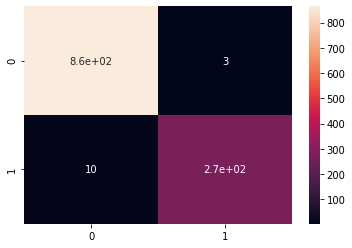

In [72]:
# evaluate the model
from sklearn.metrics import classification_report , confusion_matrix
y_pred = MNB.predict(X_test)
cm=  confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
class_report =classification_report(y_pred,y_test)
print(class_report)